In [1]:
#Outlier-an outlier is a single data point that goes far outside the average value of a data.
#an outlier is a single data point that deviates significantly from the rest of the data.
#An outlier is a value in the data set that is extremely distinct from most of the other values.
#For Example-[21,22,24,26,25,28,45]
#outlier=45
#The presence of outlier in a dataset is generally considered a problem in our analysis and modeling.
#Generally,we consider an outlier detection process when the data is there with continuous values i,e.in columns which is in numeric value.
#there are two ways to remove the outliers:-
#1.drop
#2.imputation
#two ways of impute
#1.sd-standard deviation 2.IQR-interquartile range
#SD applied on GD-gaussian distribution 
#IQR is for Skewed
#mean is more sensitive to the existence of outliers than the median.
#Due to outlier, mean is getting heavily affected so thats why we have to use median in cleaning process.

In [2]:
# We can check outlier using boxplot and viscorplot.
# boxplot is for numeric data , for categorical gives abnormal boxplot.
#droping outlier not peferable.because for drop outlier we have to drop whole row which is loss of data


In [3]:
#1.detect 
#2. remove
#3. impute-SD,IQR

In [4]:
#-+1SD=68%
#-+2SD=90%
#-+3SD=99%
# 2.5 = 95,


In [5]:
import pandas as pd

In [6]:
data_lung=pd.read_excel(r"C:\Users\khush\Downloads\LungCap.xls")
data_lung

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no
...,...,...,...,...,...,...
720,5.725,9,56.0,no,female,no
721,9.050,18,72.0,yes,male,yes
722,3.850,11,60.5,yes,female,no
723,9.825,15,64.9,no,female,no


In [7]:
data_lung.dtypes

LungCap(cc)       float64
Age( years)         int64
Height(inches)    float64
Smoke              object
Gender             object
Caesarean          object
dtype: object

In [8]:
data_lung=data_lung.rename(columns={"LungCap(cc)":"Lungcap"})
data_lung=data_lung.rename(columns={"Age(years)":"Age"})

In [9]:
data_lung.isnull().sum()

Lungcap           0
Age( years)       0
Height(inches)    0
Smoke             0
Gender            0
Caesarean         0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [11]:
data_lung.Smoke=le.fit_transform(data_lung.Smoke)
data_lung.Gender=le.fit_transform(data_lung.Gender)
data_lung.Caesarean=le.fit_transform(data_lung.Caesarean)

In [12]:
data_lung.dtypes

Lungcap           float64
Age( years)         int64
Height(inches)    float64
Smoke               int32
Gender              int32
Caesarean           int32
dtype: object

In [13]:
corr1=data_lung.corr()
corr1

,Lungcap,Age( years),Height(inches),Smoke,Gender,Caesarean
Lungcap,1.000000,0.819675,0.912187,0.101374,0.169823,0.021317
Age( years),0.819675,1.000000,0.835737,0.211232,-0.030312,0.056339
Height(inches),0.912187,0.835737,1.000000,0.176534,0.141441,0.060397
Smoke,0.101374,0.211232,0.176534,1.000000,-0.053528,0.038330
Gender,0.169823,-0.030312,0.141441,-0.053528,1.000000,0.013070
Caesarean,0.021317,0.056339,0.060397,0.038330,0.013070,1.000000


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

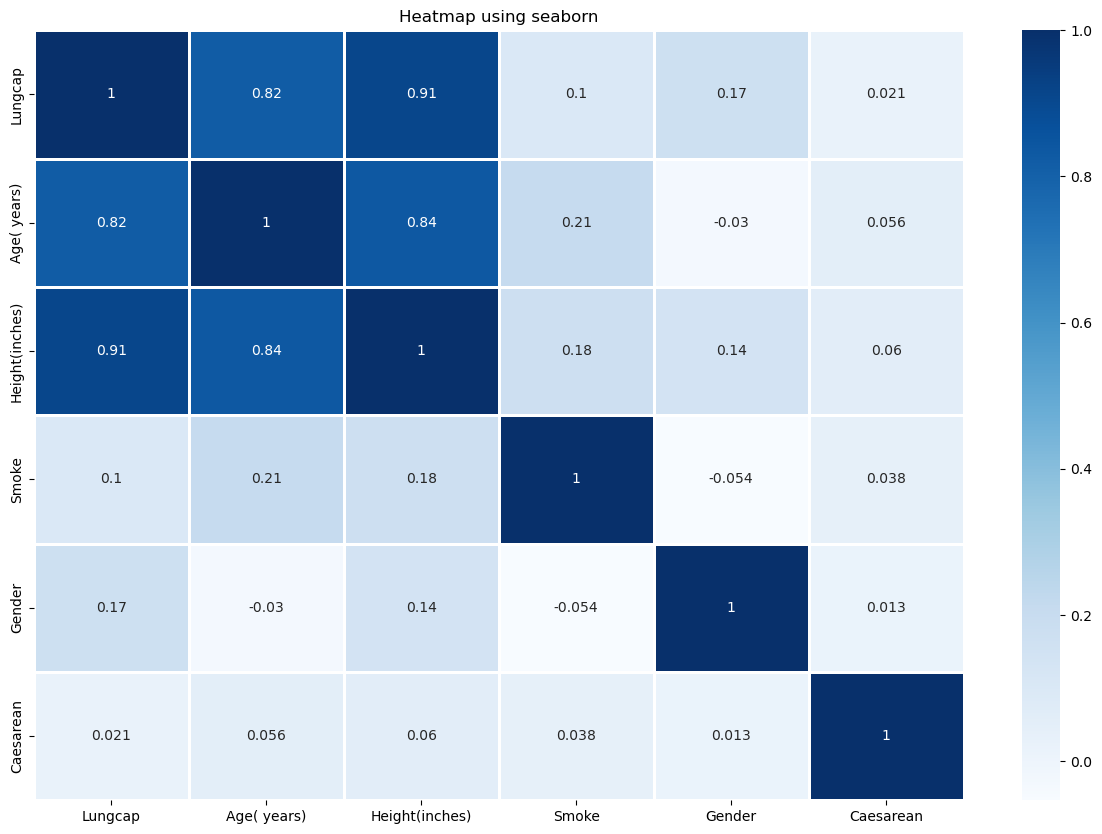

In [15]:
plt.figure(figsize=(15,10))
heatmap=sns.heatmap(corr1,linewidth=1,annot=True,cmap=plt.cm.Blues)
plt.title("Heatmap using seaborn")
plt.show()

In [16]:
#1 METHOD
import numpy as np
outliers=[]
def detect_outliers(var):
    threshold=2.5
    mean=np.mean(var)
    std=np.std(var)
    
    for i in var:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [17]:
#out=detect_outliers(data_lung.Lungcap)
#out

In [18]:
#2 to remove outlier
def remove_outliers(df,col,k=2.5):
    mean=df[col].mean()
    global df1
    sd=df[col].std()
    final_list=[x for x in df[col] if (x> mean - k*sd)]
    final_list=[x for x in df[col] if (x< mean + k*sd)]
    df1=df.loc[df[col].isin(final_list)];
    print(df1.shape);return(df1)


In [19]:
#remove_outliers(data_lung,"Lungcap",k=2.5)

# imputation of outlier

In [20]:
#Gaussian distribution=We have to apply Standard Deviation
data_lung["Lungcap"].describe()


count    725.000000
mean       7.863148
std        2.662008
min        0.507000
25%        6.150000
50%        8.000000
75%        9.800000
max       14.675000
Name: Lungcap, dtype: float64

<AxesSubplot:>

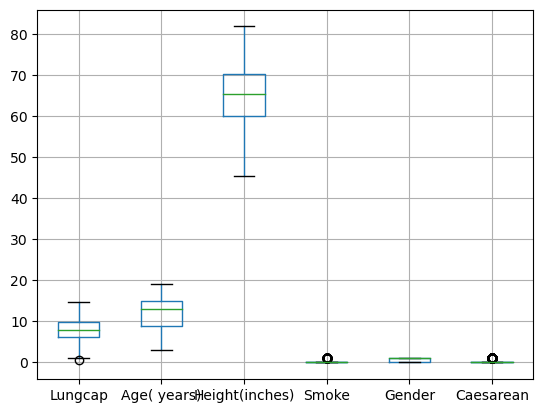

In [21]:
data_lung.boxplot()

<AxesSubplot:ylabel='Lungcap'>

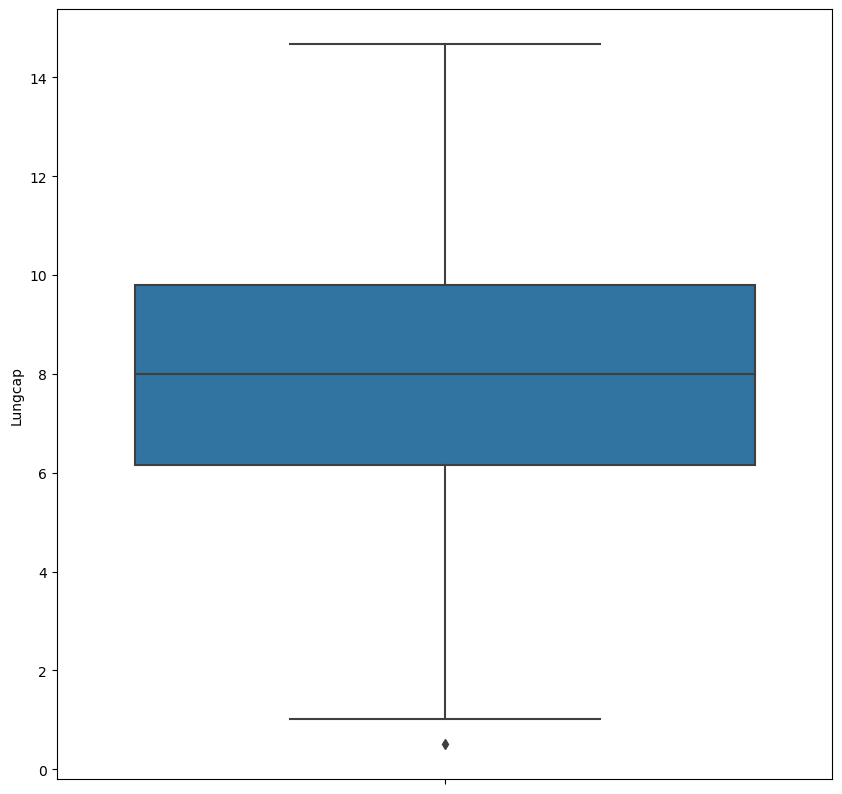

In [22]:
fig=plt.figure(figsize=(10,10))
sns.boxplot(data=data_lung,y="Lungcap")

<AxesSubplot:>

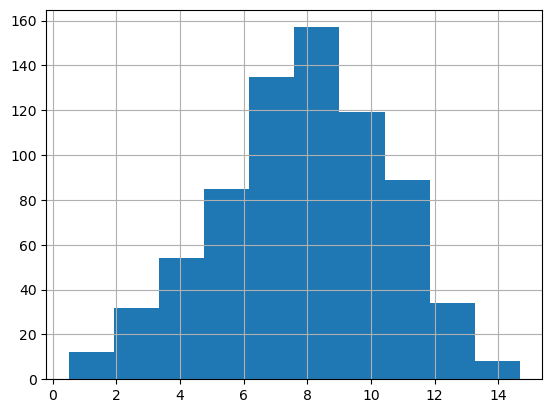

In [23]:
data_lung.Lungcap.hist()

<AxesSubplot:xlabel='Lungcap', ylabel='Density'>

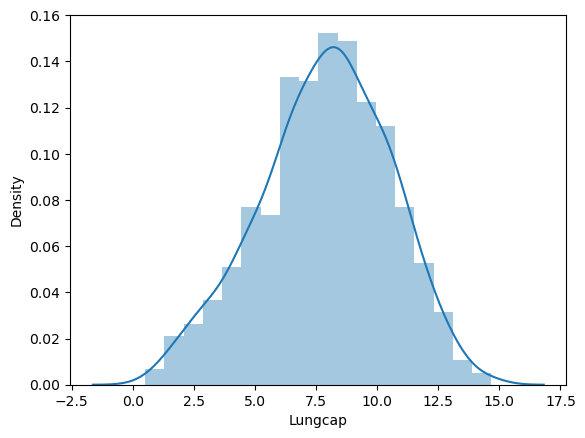

In [24]:
sns.distplot(data_lung.Lungcap)

In [25]:
ub=data_lung["Lungcap"].mean()+3*data_lung["Lungcap"].std()
lb=data_lung["Lungcap"].mean()-3*data_lung["Lungcap"].std()
print(ub,lb)

15.849172332243054 -0.12287715982926262


In [26]:
data_lung.loc[data_lung["Lungcap"]<0,"Lungcap"]=0

<AxesSubplot:>

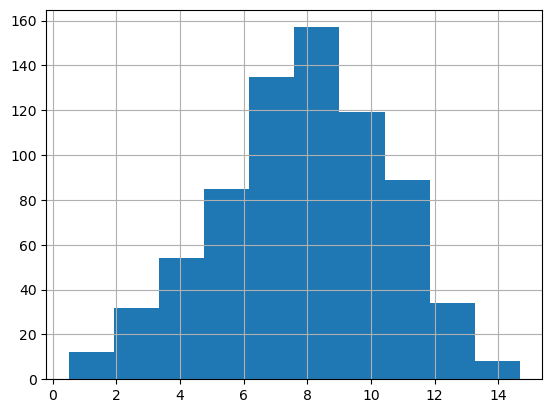

In [27]:
data_lung.Lungcap.hist()

<AxesSubplot:xlabel='Lungcap', ylabel='Density'>

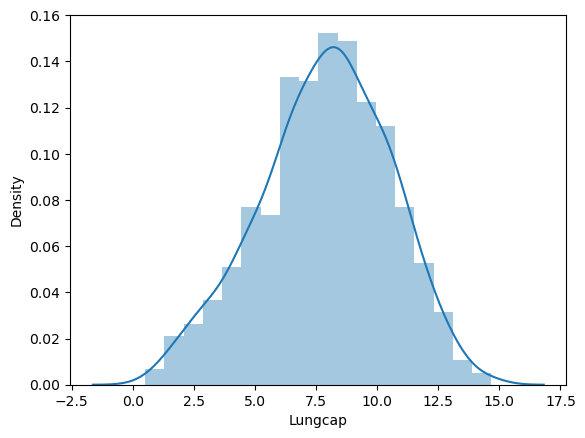

In [28]:
sns.distplot(data_lung.Lungcap)

# IQR Method

In [29]:
data_credit=pd.read_csv(r"C:\Users\khush\OneDrive\Desktop\Python Dataset\Credit_Risk_data.csv")
data_credit.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [30]:
data_credit.shape

(614, 13)

In [31]:
data_credit.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

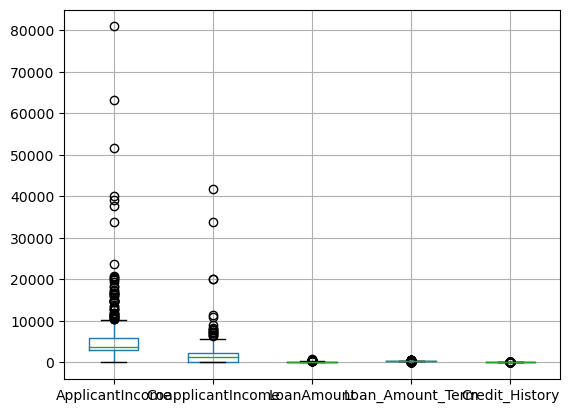

In [32]:
data_credit.boxplot()

<AxesSubplot:ylabel='ApplicantIncome'>

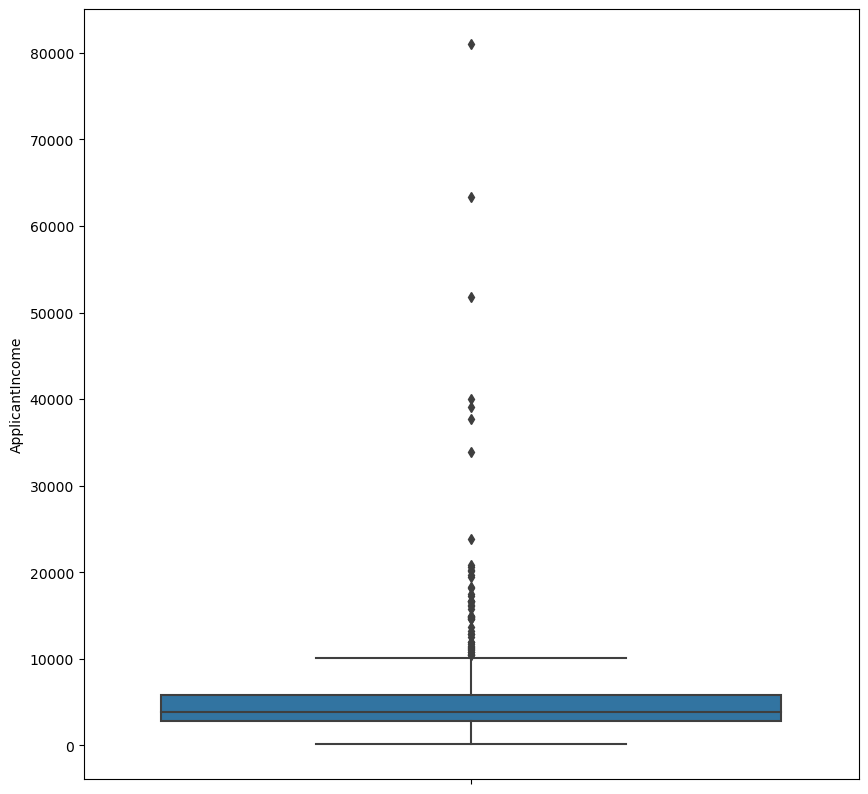

In [33]:
fig=plt.figure(figsize=(10,10))
sns.boxplot(data=data_credit,y="ApplicantIncome")

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

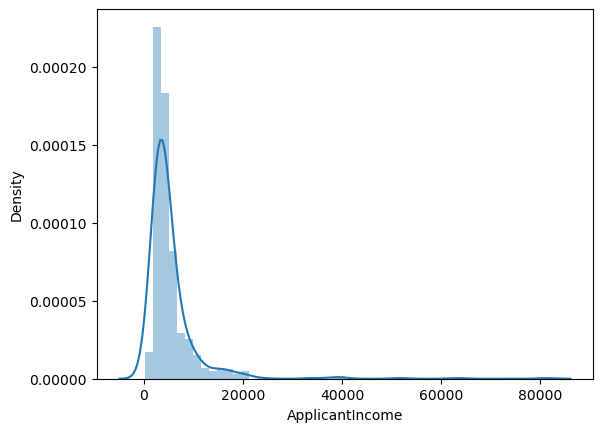

In [34]:
sns.distplot(data_credit.ApplicantIncome)

<AxesSubplot:>

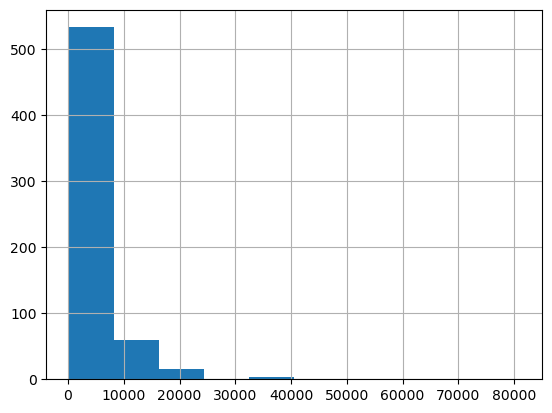

In [35]:
data_credit.ApplicantIncome.hist()

In [36]:
data_credit.ApplicantIncome.describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [37]:
IQR=data_credit.ApplicantIncome.quantile(0.75)-data_credit.ApplicantIncome.quantile(0.25)
IQR

2917.5

In [38]:
ub1=data_credit.ApplicantIncome.quantile(0.75)+3*IQR
lb1=data_credit.ApplicantIncome.quantile(0.25)-3*IQR
print(ub1,lb1)

14547.5 -5875.0


In [39]:
data_credit.loc[data_credit["ApplicantIncome"]>14547,"ApplicantIncome"]=14547

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

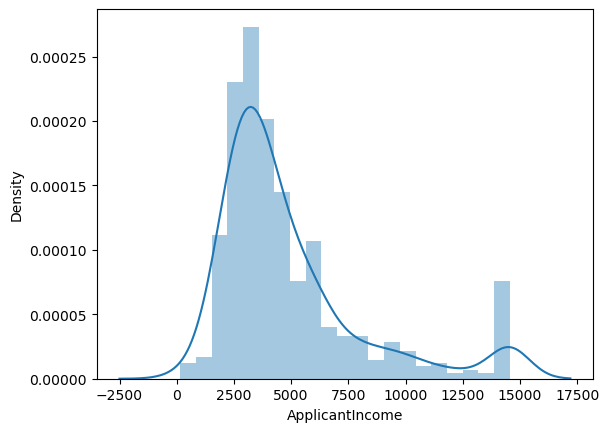

In [40]:
sns.distplot(data_credit.ApplicantIncome)

<AxesSubplot:>

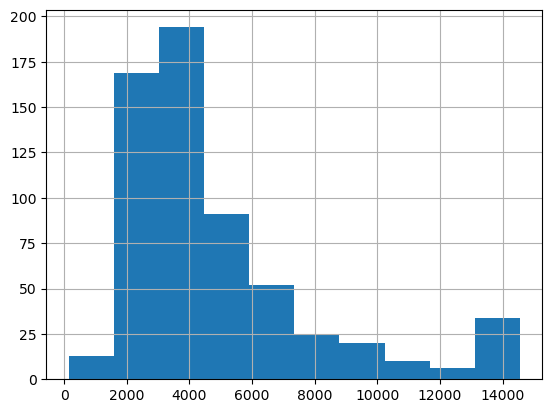

In [41]:
data_credit.ApplicantIncome.hist()

<AxesSubplot:ylabel='CoapplicantIncome'>

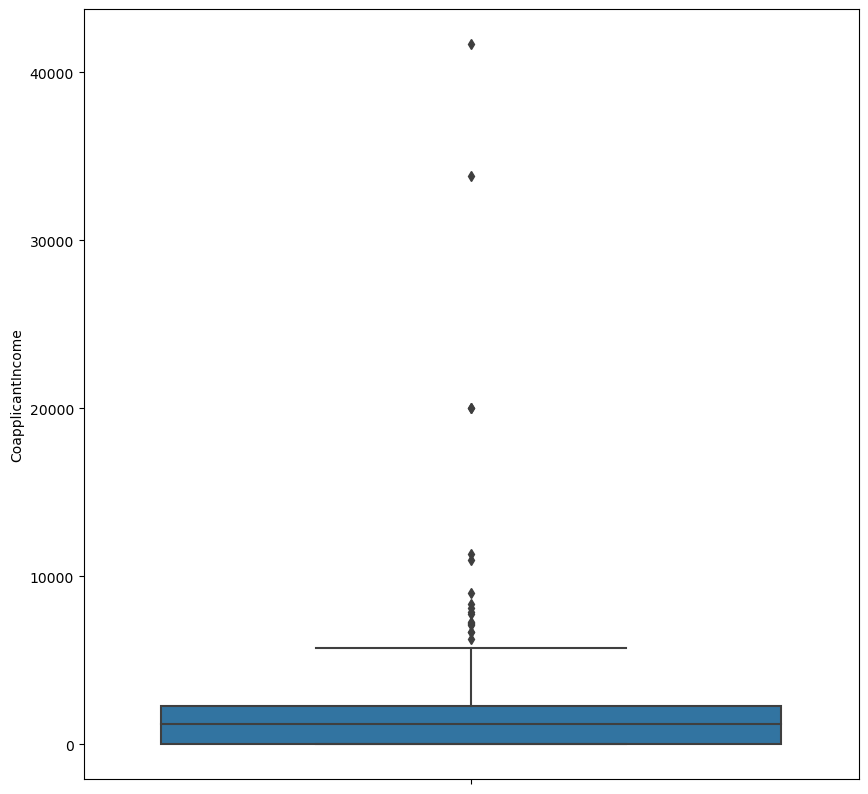

In [42]:
fig=plt.figure(figsize=(10,10))
sns.boxplot(data=data_credit,y="CoapplicantIncome")

In [43]:
data_credit.CoapplicantIncome.skew()

7.491531216657306

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

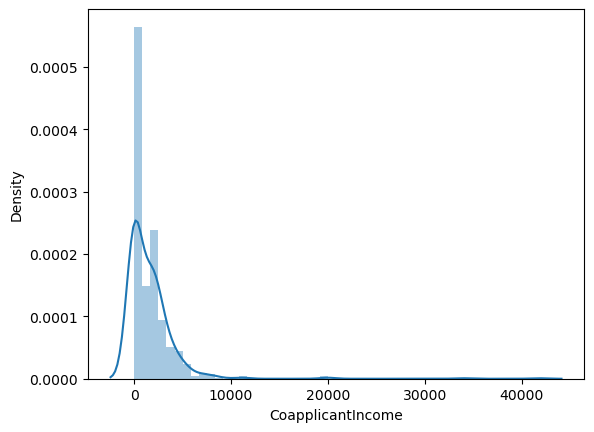

In [44]:
sns.distplot(data_credit.CoapplicantIncome)

<AxesSubplot:>

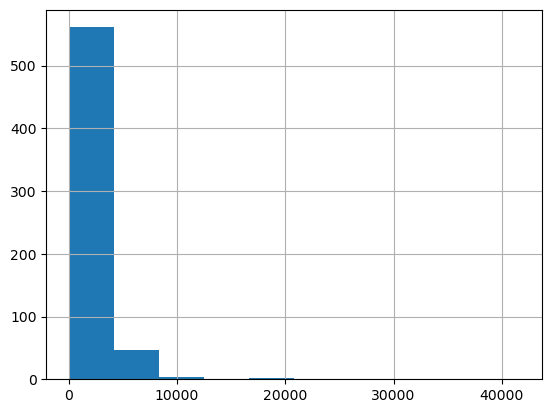

In [45]:
data_credit.CoapplicantIncome.hist()

In [46]:
data_credit.CoapplicantIncome.describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [47]:
IQR1=data_credit.CoapplicantIncome.quantile(0.75)-data_credit.CoapplicantIncome.quantile(0.25)
IQR1

2297.25

In [48]:
ub1=data_credit.CoapplicantIncome.quantile(0.75)+3*IQR
lb1=data_credit.CoapplicantIncome.quantile(0.25)-3*IQR
print(ub1,lb1)

11049.75 -8752.5


In [49]:
data_credit.loc[data_credit["CoapplicantIncome"]>9189,"CoapplicantIncome"]=9189

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

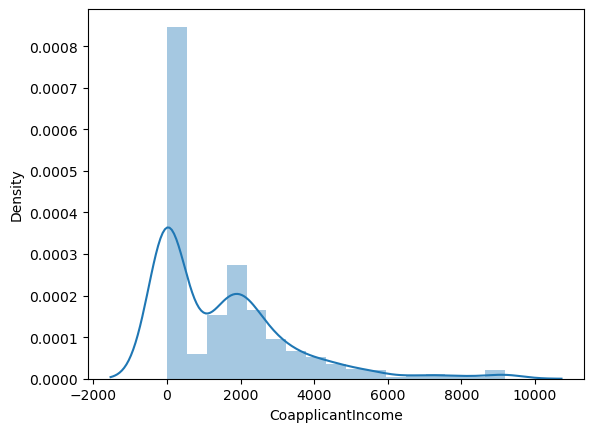

In [50]:
sns.distplot(data_credit.CoapplicantIncome)

<AxesSubplot:>

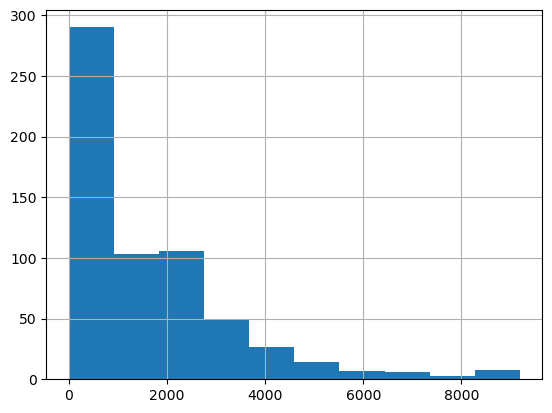

In [51]:
data_credit.CoapplicantIncome.hist()

In [52]:
data_credit.CoapplicantIncome.skew()

1.657232682860982

In [53]:
data_credit.skew()

ApplicantIncome      1.710840
CoapplicantIncome    1.657233
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

# Skewness Treatment

In [54]:
data_credit.skew()

ApplicantIncome      1.710840
CoapplicantIncome    1.657233
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

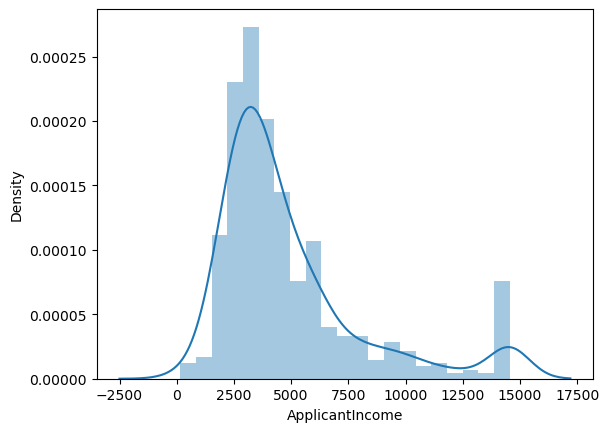

In [55]:
sns.distplot(data_credit.ApplicantIncome)
plt.show()

In [56]:
np.log(0)

-inf

In [57]:
#if column is -ve skewed-square transformation
#+ve skewd- squareroot,cuberoot,log
#for log transformation column should be free from'0'

In [58]:
#data_credit["ApplicantIncome"]=np.sqrt(data_credit["ApplicantIncome"])

In [59]:
#data_credit.ApplicantIncome.skew()

In [60]:
#sns.distplot(data_credit.ApplicantIncome)

In [61]:
#data_credit["ApplicantIncome"]=np.cbrt(data_credit["ApplicantIncome"])

In [62]:
#data_credit.ApplicantIncome.skew()

In [63]:
#sns.distplot(data_credit.ApplicantIncome)

In [64]:
#d1=data_credit[data_credit.ApplicantIncome>0]

In [65]:
#d1.shape

In [66]:
data_credit["ApplicantIncome"]=np.log(data_credit["ApplicantIncome"])

In [67]:
#data_credit.ApplicantIncome.skew()

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

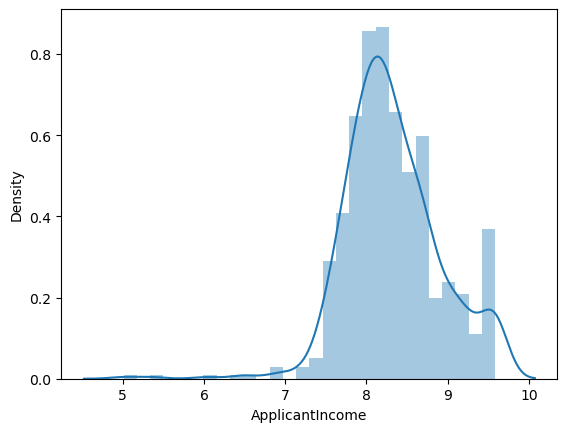

In [68]:
sns.distplot(data_credit.ApplicantIncome)

In [69]:
data_credit.CoapplicantIncome.skew()

1.657232682860982

In [70]:
#data_credit["CoapplicantIncome"]=np.sqrt(data_credit["CoapplicantIncome"])

In [71]:
#data_credit.CoapplicantIncome.skew()

In [72]:
#sns.distplot(data_credit.ApplicantIncome)

In [73]:
data_credit["CoapplicantIncome"]=np.cbrt(data_credit["CoapplicantIncome"])

In [74]:
data_credit.CoapplicantIncome.skew()

0.03144401295367053

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

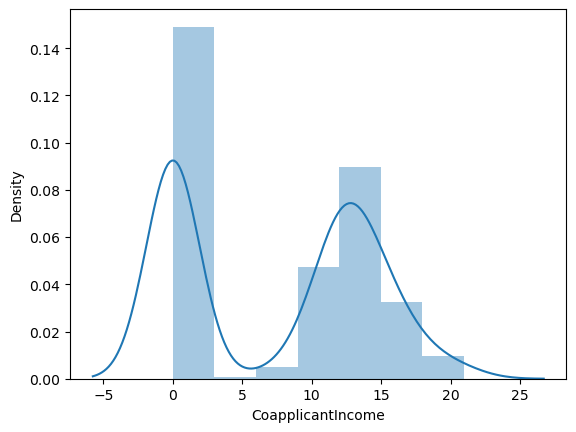

In [75]:
sns.distplot(data_credit.CoapplicantIncome)

In [76]:
#data_credit["CoapplicantIncome"]=np.log(data_credit["CoapplicantIncome"])

In [77]:
#data_credit.CoapplicantIncome.skew()

In [78]:
#sns.distplot(data_credit.CoapplicantIncome)

In [79]:
data_credit.LoanAmount.skew()

2.677551679256059

In [80]:
#data_credit["LoanAmount"]=np.sqrt(data_credit["LoanAmount"])

In [81]:
#data_credit.CoapplicantIncome.skew()

In [82]:
#sns.distplot(data_credit.ApplicantIncome)

In [83]:
#data_credit["LoanAmount"]=np.cbrt(data_credit["LoanAmount"])

In [84]:
#data_credit.LoanAmount.skew()

In [85]:
#sns.distplot(data_credit.LoanAmount)

In [86]:
data_credit["LoanAmount"]=np.log(data_credit["LoanAmount"])

In [87]:
data_credit.LoanAmount.skew()

-0.19299810452881644

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

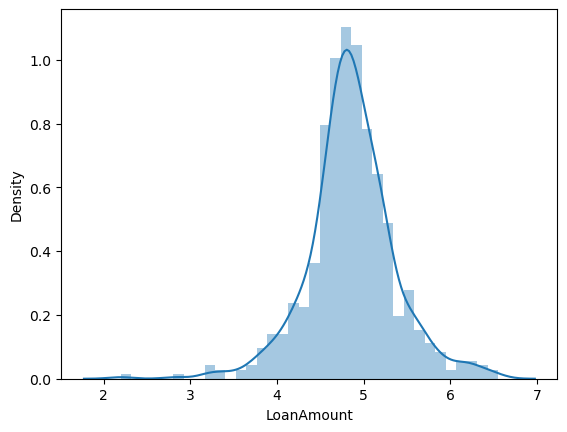

In [88]:
sns.distplot(data_credit.LoanAmount)

In [89]:
data_lung.head(2)

,Lungcap,Age( years),Height(inches),Smoke,Gender,Caesarean
0,6.475,6,62.1,0,1,0
1,10.125,18,74.7,1,0,0


In [90]:
x=data_lung.iloc[:,1:]

In [91]:
x.head(2)

,Age( years),Height(inches),Smoke,Gender,Caesarean
0,6,62.1,0,1,0
1,18,74.7,1,0,0


In [92]:
y=data_lung.iloc[:,0]

In [93]:
y.head(2)

0     6.475
1    10.125
Name: Lungcap, dtype: float64

In [94]:
import sklearn
from sklearn.model_selection import train_test_split

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [96]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((580, 5), (145, 5), (580,), (145,))

In [97]:
from sklearn import linear_model
ln=linear_model.LinearRegression()

In [98]:
ln.fit(x_train,y_train)

LinearRegression()

In [99]:
p1=ln.predict(x_test)
p1

array([ 7.54766894,  5.68204508,  6.32558014, 10.79158567,  3.47236857,
        5.63130484,  7.27875094,  4.71141679,  8.91580848,  4.95831192,
       11.72347409,  7.56462836,  5.91965819, 10.37350125,  4.21082044,
        7.82945863,  5.41906185,  7.88227746,  4.6579582 ,  8.00433113,
       11.06137499,  7.67539087,  8.5790287 ,  8.42968843,  8.20135733,
        6.05850917,  9.8407287 ,  9.43496886,  8.03985459, 11.47657896,
        7.90740517,  6.75959055, 10.03728811,  4.85683143, 10.93884735,
        9.04513502,  3.28821404,  8.88635062,  4.40425698,  7.48579965,
        5.69404545,  8.71988882,  7.64073873,  8.61160225,  7.08915972,
        5.98920489,  6.82617649,  8.01569174,  8.52597463,  6.22001192,
        4.28668839,  8.39503629,  6.52173503,  5.43474542,  9.92900154,
       10.49515758, 13.22031126,  4.10005794,  1.03436096,  3.05035852,
       10.78230365, 11.30307584, 10.46074067,  4.86363752,  6.48708289,
        7.91052805, 11.23896584,  2.01698961,  4.45499722,  9.76

In [100]:
len(p1)

145

In [101]:
ln.intercept_

-11.018922745502772

In [102]:
ln.coef_

array([ 0.18687287,  0.25370122, -0.60703588,  0.37646409, -0.1482951 ])

# by calculation

In [103]:
#R2=SSE/SST
#SST=SSE+SSR

In [104]:
p_train=ln.predict(x_train)
p_train

array([ 3.27868961,  6.66451163,  5.95615737,  7.83417527, 11.28018165,
        4.72750489, 10.12676823, 11.03064848,  9.95557894,  8.62993105,
        5.20001277,  5.26396066, 11.9396427 ,  9.20935611, 11.53660122,
       11.04776282,  9.3535021 ,  7.09308535,  4.15055576, 11.40975061,
        8.49379843,  5.29221124,  3.88348479,  7.88515792,  4.53791367,
        8.56702833,  9.71428261,  8.93437251, 11.2829    ,  6.73294459,
        8.17351128,  7.20672831, 11.34972835,  3.04627078,  8.7914338 ,
       12.01863353,  6.24018776,  3.40825857, 11.7021917 ,  6.22826051,
        7.90100361, 10.04657013,  1.46565302, 10.03728811,  6.60736982,
       10.48611079,  5.07316216,  9.13509279,  6.74350245,  6.26307476,
       12.24696462,  7.49260573, 10.19879086, 10.98254628, 12.65000611,
        4.55647771,  9.25922504,  9.11468171,  8.06915033, 11.50194908,
        3.8995729 ,  6.95574544,  9.58903663, 12.37109688,  7.81832958,
        6.80352471, 10.73403934,  8.11308449,  5.91285211,  3.95

In [105]:
mean_y=y_train.mean()
mean_y

7.837124137931033

In [106]:
SSE=np.sum(np.square(p_train-y_train))
SSE

544.8441751893531

In [107]:
SSR=np.sum(np.square(p_train-mean_y))
SSR

3570.654941872723

In [108]:
R2=SSR/(SSE+SSR)
R2

0.8676116408504299

In [109]:
adj_R2=1-((1-R2)*(580-1))/(580-5-1)
adj_R2

0.8664584321470363

In [110]:
from sklearn import metrics

In [111]:
MAE=metrics.mean_absolute_error(y_test,p1)
MAE

0.9511491414785208

In [112]:
MSE=metrics.mean_squared_error(y_test,p1)
MSE

1.4291053635036317

In [113]:
RMSE=np.sqrt(MSE)
RMSE

1.1954519494750224

In [114]:
#Calculating of r2 by syntax
r_sq=ln.score(x_train,y_train)
r_sq

0.8676116408504295

In [117]:
#MAPE 
error=y_test-p1
#error
abs_error=np.abs(error)
abs_error

642    0.402331
269    3.092955
267    1.024420
351    0.883414
613    0.227631
         ...   
473    0.972657
240    0.087568
6      1.813516
448    1.188736
23     0.208469
Name: Lungcap, Length: 145, dtype: float64

In [118]:
MAPE=np.mean(abs_error/y_test)*100
MAPE

13.859508171724007

In [119]:
Accuracy=100-MAPE
Accuracy

86.140491828276

In [ ]:
#RMSlE is for  under predicted i.e, predicted value is less than the actual value
#not having pre-defined function
#actual=100 , predicted =110 ,RMSE=sqrt(110-100)=3.162----km
#actual=1000, predicted=1100, RMSE=sqrt(1100-1000)=10-----m
#RMSLE is depends on unit also.
#calculation:
#A: (Actual:100,pred:90)------underpred
#B: (Actual:100,pred:110)-----overpred
#error(A)=log(90+1)-log(100+1)
#error(A)2=
#sqrt(error-A)=
#error(B)=log(110+1)-log(100+1)
#error(B)2=
#sqrt(error-B)=

#for underpredicted records RMSLE is large while for overpredicted it is less

In [120]:
def RMSLE (pred,act):
    total=0.0
    for i in range(len(act)):
        pred_val=np.log(pred[i]+1)
        act_val=np.log(act[i]+1)
        total=total+(act_val-pred_val)**2
        global tot_log_error
        tot_log_error=np.sqrt(total/(len(pred)))

In [121]:
y1_test=np.array(y_test)

In [122]:
RMSLE(p1,y1_test)
tot_log_error

0.15348332827153857

In [123]:
#When MSE is high is called penalization.

In [124]:
#generalization/regularisation are called as a 
#lasso(L1)
#Ridge(L2)
#only for numeric column
#1. overfitted
#2. multicolinearity
#3. penalized


#LE=MSE,
#L1=MSE+lambda|beta|
#L2=MSE+lambda summation of beta

#if there is difference between R2 and adj R2 there will be error.
#R2 is high there will be non significant features
#lasso also used for features selection.
#if there is non significant features MSE is also high.


In [125]:
#generalization and regulization techniques:
#1. Lasso(L1): 
#2. Ridge(L2)

#1. Overfitting
#2. multicolinearity
#3. model get penalized

#these are called cost function i.e, error function
#LE=MSE
#L1=MSE+lambda|beta|
#L2=MSE+lambda summation of beta

#Lasso also used for the features selection by making non significant features coefficient zero.


In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

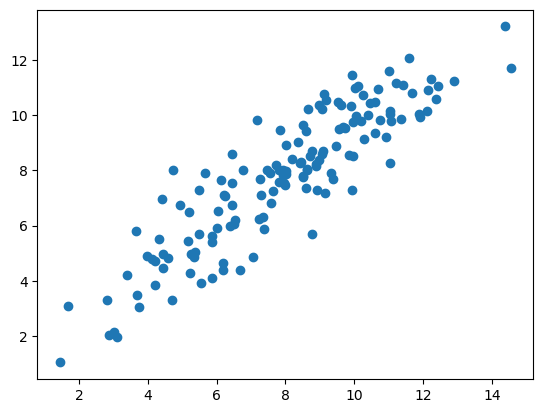

In [127]:
plt.scatter(y_test,p1)

In [ ]:
df1=

In [ ]:
sns.lmplot(data=lc,x="Actual",y="Predicted")

# LASSO(L1)

In [128]:
from sklearn.linear_model import Lasso
lasso=Lasso()

In [129]:
lasso.fit(x_train,y_train)

Lasso()

In [130]:
lp=lasso.predict(x_test)

In [131]:
lp

array([ 8.2027545 ,  5.98810902,  6.57168019, 10.34229544,  3.90838768,
        5.92828941,  6.90134808,  4.92532094,  9.10004855,  4.86616141,
       11.09070056,  7.58861345,  6.09312336,  9.84911375,  4.68538245,
        8.44137284,  5.85318487,  7.96281601,  4.95589082,  8.74113093,
       10.83547713,  7.54407879,  8.08377537,  8.08311529,  7.81392708,
        5.98810902,  9.22100791,  9.0116393 ,  7.79864214, 11.14986009,
        7.56068387,  6.98975734,  9.80325893,  4.74652221, 10.88133195,
        8.72716614,  3.77280346,  8.62149172,  4.6567928 ,  7.58927353,
        5.73354567,  8.96578448,  7.67834286,  8.48788773,  6.94654282,
        6.25663716,  6.81161868,  8.03858063,  8.8155754 ,  6.00339396,
        4.34306992,  8.21737936,  6.45270106,  5.34603839,  9.32536218,
       10.61148365, 12.85537886,  4.72991712,  1.55947813,  3.23574718,
       10.50646931, 11.3891385 , 10.49250452,  5.10477975,  6.58696513,
        8.17152455, 11.04484574,  2.36770285,  4.7166124 ,  9.92

In [132]:
lasso.coef_

array([ 0.04519474,  0.29909802, -0.        ,  0.        , -0.        ])

In [133]:
lR2=lasso.score(x_train,y_train)
lR2

0.8461430771880485

In [134]:
L_AdR2=1-(((1-lR2)*(580-1))/(580-5-1))
L_AdR2

0.8448028600903834

In [135]:
final_df=pd.DataFrame({"Importance":list(lasso.coef_),"columns":list(x)})
final_df

,Importance,columns
0,0.045195,Age( years)
1,0.299098,Height(inches)
2,-0.000000,Smoke
3,0.000000,Gender
4,-0.000000,Caesarean


In [136]:
#df =lungcap+age+height

In [143]:
new=data_lung.iloc[:,:3]

In [144]:
new

,Lungcap,Age( years),Height(inches)
0,6.475,6,62.1
1,10.125,18,74.7
2,9.550,16,69.7
3,11.125,14,71.0
4,4.800,5,56.9
...,...,...,...
720,5.725,9,56.0
721,9.050,18,72.0
722,3.850,11,60.5
723,9.825,15,64.9


In [145]:
new_x=new.iloc[:,1:]
new_y=new.iloc[:,0]

In [147]:
#new_y.head()

0     6.475
1    10.125
2     9.550
3    11.125
4     4.800
Name: Lungcap, dtype: float64

In [148]:
x_tr,x_te,y_tr,y_te=train_test_split(new_x,new_y,test_size=0.2,random_state=100)

In [149]:
x_tr.shape,x_te.shape,y_tr.shape,y_te.shape

((580, 2), (145, 2), (580,), (145,))

In [150]:
ln.fit(x_tr,y_tr)

LinearRegression()

In [151]:
new_p=ln.predict(x_te)

In [153]:
new_r2=ln.score(x_tr,y_tr)
new_r2

0.8507546085170627

In [154]:
new_AdR2=1-(((1-new_r2)*(580-1))/(580-2-1))
new_AdR2

0.850237293468595

In [155]:
from sklearn import metrics

In [156]:
new_mse=metrics.mean_squared_error(y_te,new_p)
new_mse

1.3096636180831516

In [157]:
#mape,scatter plot